In [3]:
# Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [4]:
# Read the Data
df = pd.read_csv('C:/Users/Ahmed/Desktop/Untitled Folder/Explotery/listings.csv')

In [5]:
#Clearing Data

In [6]:
df = df.drop('license', axis =1)

In [7]:
df = df.drop('neighbourhood_group', axis =1)

In [35]:
df['last_review'] = df['last_review'].fillna(df['last_review'].median())
df['reviews_per_month'] = df['reviews_per_month'].fillna(df['reviews_per_month'].median())
df['price'] = df['price'].fillna(df['price'].median())

In [36]:
df['last_review'] = pd.to_datetime(df['last_review'])

In [37]:
#Data Exploration

In [38]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,4.100000e+02,4.100000e+02,410.000000,410.000000,410.000000,410.000000,410.000000,410,410.000000,410.000000,410.000000,410.000000
mean,4.865518e+17,2.211516e+08,42.657638,-73.776650,122.592683,5.134146,53.363415,2023-09-10 07:47:07.317073408,1.969024,5.009756,213.158537,16.009756
min,1.489424e+06,6.490680e+05,42.630660,-73.876489,24.000000,1.000000,0.000000,2018-07-27 00:00:00,0.020000,1.000000,0.000000,0.000000
25%,4.559817e+07,4.762598e+07,42.652365,-73.790128,75.000000,1.000000,4.000000,2023-09-10 00:00:00,0.630000,1.000000,88.250000,1.000000
50%,6.555312e+17,1.770740e+08,42.657295,-73.773541,100.000000,2.000000,16.000000,2023-11-21 00:00:00,1.360000,3.000000,251.500000,6.000000
75%,8.809967e+17,3.920749e+08,42.661715,-73.761975,130.000000,3.000000,59.750000,2023-12-17 00:00:00,2.570000,8.000000,347.000000,23.000000
max,1.056469e+18,5.531120e+08,42.714896,-73.738250,1209.000000,365.000000,755.000000,2024-01-05 00:00:00,11.110000,19.000000,365.000000,133.000000
std,4.224464e+17,1.813861e+08,0.009688,0.019354,103.411029,21.470946,96.382425,NaN,1.968607,4.802699,136.139461,22.189667


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              410 non-null    int64         
 1   name                            410 non-null    object        
 2   host_id                         410 non-null    int64         
 3   host_name                       410 non-null    object        
 4   neighbourhood                   410 non-null    object        
 5   latitude                        410 non-null    float64       
 6   longitude                       410 non-null    float64       
 7   room_type                       410 non-null    object        
 8   price                           410 non-null    float64       
 9   minimum_nights                  410 non-null    int64         
 10  number_of_reviews               410 non-null    int64         
 11  last_r

In [40]:
# Overview of the categorical data
RoomTypesCount = df['room_type'].value_counts()
NeighbourhoodCount = df['neighbourhood'].value_counts()

In [41]:
#Data Visualization

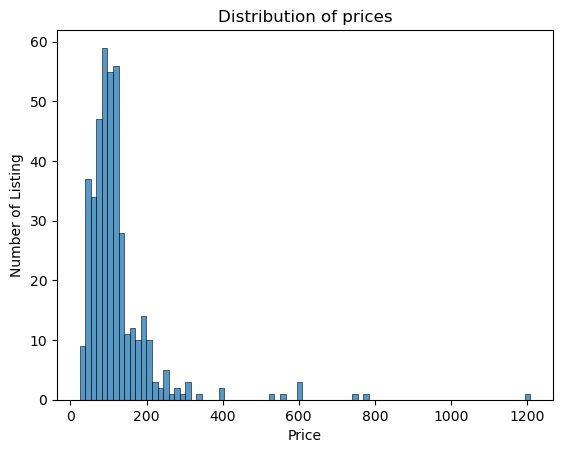

In [42]:
sns.histplot(df['price'])
plt.title('Distribution of prices')
plt.xlabel('Price')
plt.ylabel('Number of Listing')
plt.show()

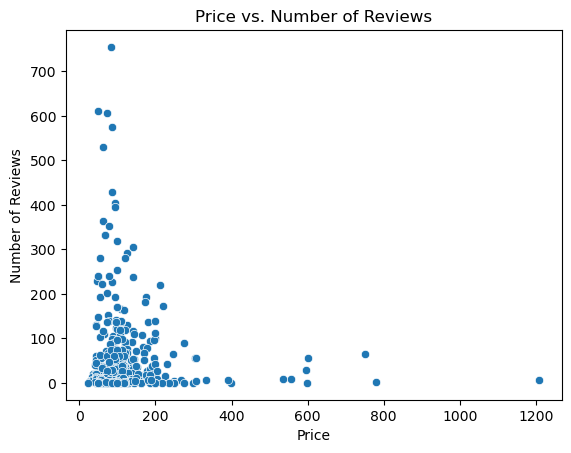

In [43]:
sns.scatterplot(x='price',y='number_of_reviews', data=df)
plt.title('Price vs. Number of Reviews')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.show()

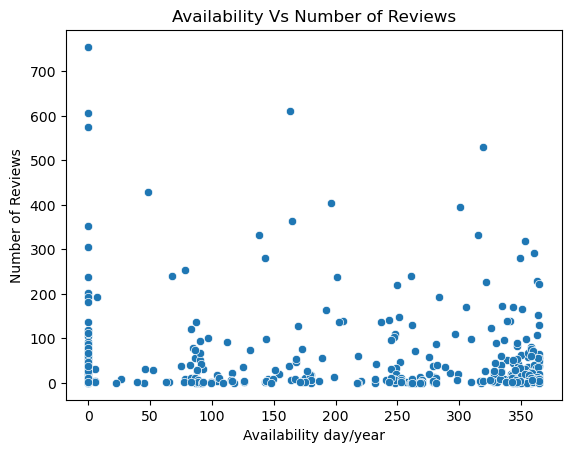

In [44]:
sns.scatterplot(x='availability_365',y='number_of_reviews', data=df)
plt.title('Availability Vs Number of Reviews')
plt.xlabel('Availability day/year')
plt.ylabel('Number of Reviews')
plt.show()

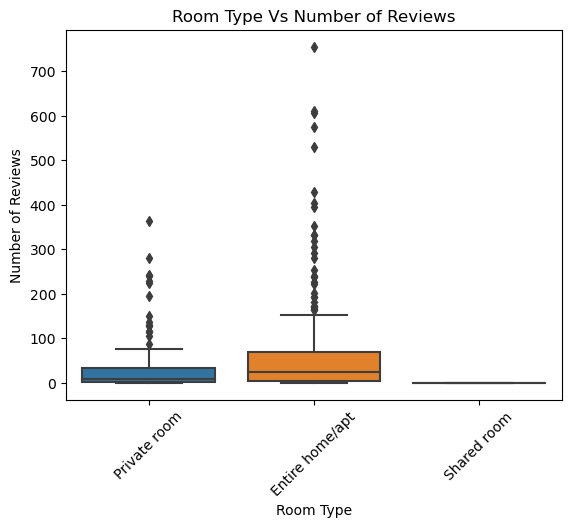

In [45]:
sns.boxplot(x='room_type',y='number_of_reviews',data=df)
plt.title('Room Type Vs Number of Reviews')
plt.xlabel('Room Type')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              410 non-null    int64         
 1   name                            410 non-null    object        
 2   host_id                         410 non-null    int64         
 3   host_name                       410 non-null    object        
 4   neighbourhood                   410 non-null    object        
 5   latitude                        410 non-null    float64       
 6   longitude                       410 non-null    float64       
 7   room_type                       410 non-null    object        
 8   price                           410 non-null    float64       
 9   minimum_nights                  410 non-null    int64         
 10  number_of_reviews               410 non-null    int64         
 11  last_r

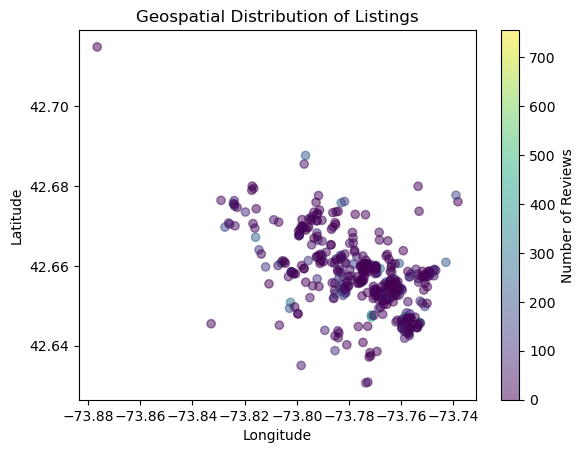

In [47]:
plt.scatter(df['longitude'],df['latitude'], c=df['number_of_reviews'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Number of Reviews')
plt.title('Geospatial Distribution of Listings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

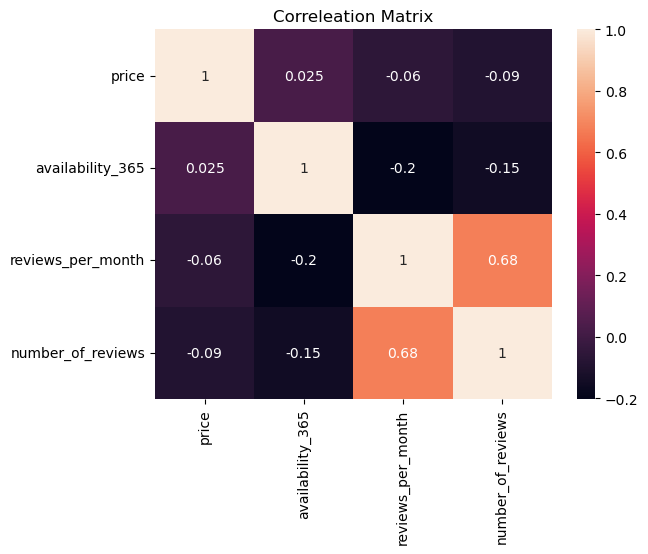

In [48]:
correlation = df[['price','availability_365','reviews_per_month','number_of_reviews']].corr()
sns.heatmap(correlation, annot=True)
plt.title('Correleation Matrix')
plt.show()

In [49]:
room_type_demand = df.groupby('room_type')['number_of_reviews'].mean().sort_values(ascending=True)

In [50]:
#Recommended Business Plan

In [51]:
print("According to the analyzed data, the city has to work more on: Shared Rooms and the number of listings for the price of 1200")
print("There are many demand on both of them and the company doesn't always offer them")
print("They have to work on those two points to avoid loosing of a good market share")

According to the analyzed data, the city has to work more on: Shared Rooms and the number of listings for the price of 1200
There are many demand on both of them and the company doesn't always offer them
They have to work on those two points to avoid loosing of a good market share
